In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load your Excel file
file_path = "PCF_data.xlsx"
df = pd.read_excel(file_path)

In [ ]:
df.shape

(1118, 11)

In [ ]:
print(df.head(5))

   core-ref-index-at-wl-1.55um  clad-ref-index  no-of-\nrings  diaBYpitch  \
0                        1.444               1              4         0.6   
1                        1.444               1              4         0.6   
2                        1.444               1              4         0.6   
3                        1.444               1              4         0.6   
4                        1.444               1              4         0.6   

   pitch\n(um)  wl\n(um)     neff  Aeff\n(um^2)  dispersion\n(ps/km.nm)  \
0          0.8   1.58333  1.33418       5.02490                -457.994   
1          0.8   1.41322  1.34653       2.81363                -502.289   
2          0.8   1.27612  1.35866       1.96006                -432.099   
3          0.8   1.16327  1.37008       1.55828                -314.841   
4          0.8   1.06875  1.38044       1.33372                -198.731   

   conf-loss\n(dB/cm)  conf-loss-in-log10\n(dB/cm)  
0          155.015000            

In [ ]:
# Define input and output features
input_cols = [
    'core-ref-index-at-wl-1.55um',
    'no-of-\nrings',
    'diaBYpitch',
    'pitch\n(um)',
    'wl\n(um)'
]

output_cols = [
    'neff',
    'Aeff\n(um^2)',
    'dispersion\n(ps/km.nm)',
    'conf-loss-in-log10\n(dB/cm)'
]

In [ ]:
X = df[input_cols].values
y = df[output_cols].values

In [ ]:
# Feature Scaling
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)


In [ ]:
# Train KNN regressor
knn = KNeighborsRegressor(
    n_neighbors=4,
    algorithm='ball_tree',
    weights='distance'
)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=4, weights='distance')

In [ ]:
# Predict and inverse transform predictions
y_pred_scaled = knn.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

In [ ]:
# Evaluate model
mse = mean_squared_error(y_test_original, y_pred, multioutput='raw_values')
r2 = r2_score(y_test_original, y_pred, multioutput='raw_values')

In [ ]:
# Display results
for i, col in enumerate(output_cols):
    print(f"--- {col} ---")
    print(f"MSE: {mse[i]:.4f}")
    print(f"R² Score: {r2[i]:.4f}")
    print()

--- neff ---
MSE: 0.0000
R² Score: 0.9777

--- Aeff
(um^2) ---
MSE: 0.0300
R² Score: 0.9699

--- dispersion
(ps/km.nm) ---
MSE: 2037.9095
R² Score: 0.9080

--- conf-loss-in-log10
(dB/cm) ---
MSE: 0.4868
R² Score: 0.9872



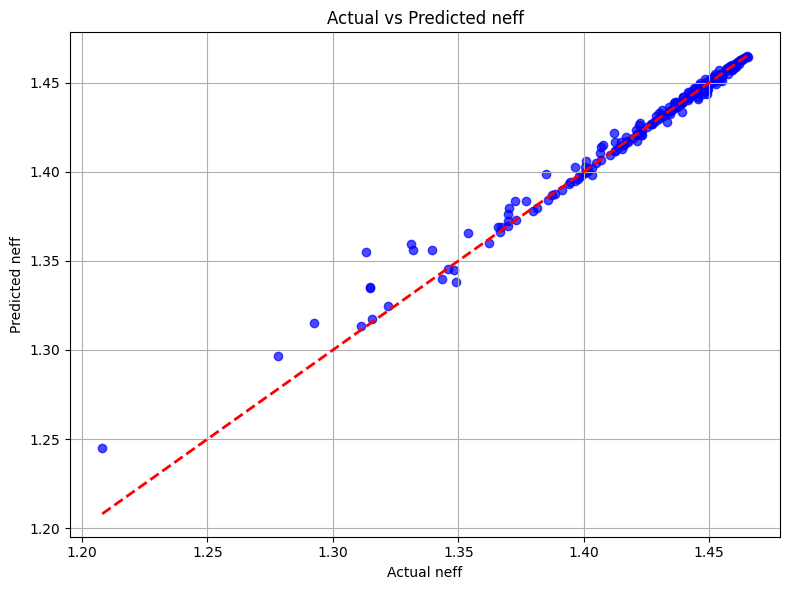

In [ ]:
import matplotlib.pyplot as plt

# Extract 'neff'
actual_neff = y_test_original[:, 0]
predicted_neff = y_pred[:, 0]

# Plot actual vs predicted neff
plt.figure(figsize=(8, 6))
plt.scatter(actual_neff, predicted_neff, color='blue', alpha=0.7)
plt.plot([min(actual_neff), max(actual_neff)],
         [min(actual_neff), max(actual_neff)],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted neff')
plt.xlabel('Actual neff')
plt.ylabel('Predicted neff')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming actual_neff and predicted_neff are numpy arrays from your test and prediction
neff_comparison_df = pd.DataFrame({
    'Actual neff': actual_neff,
    'Predicted neff': predicted_neff
})

print(neff_comparison_df.head())

   Actual neff  Predicted neff
0      1.42285        1.420338
1      1.43091        1.432229
2      1.42198        1.426376
3      1.42118        1.417298
4      1.45896        1.457240


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Compute evaluation metrics for neff
mse_neff = mean_squared_error(actual_neff, predicted_neff)
mape_neff = mean_absolute_percentage_error(actual_neff, predicted_neff)
r2_neff = r2_score(actual_neff, predicted_neff)

print(f"Mean Squared Error (MSE) for neff: {mse_neff:.6f}")
print(f"Mean Absolute Percentage Error (MAPE) for neff: {mape_neff * 100:.2f}%")
print(f"R² Score for neff: {r2_neff:.4f}")

Mean Squared Error (MSE) for neff: 0.000036
Mean Absolute Percentage Error (MAPE) for neff: 0.19%
R² Score for neff: 0.9777


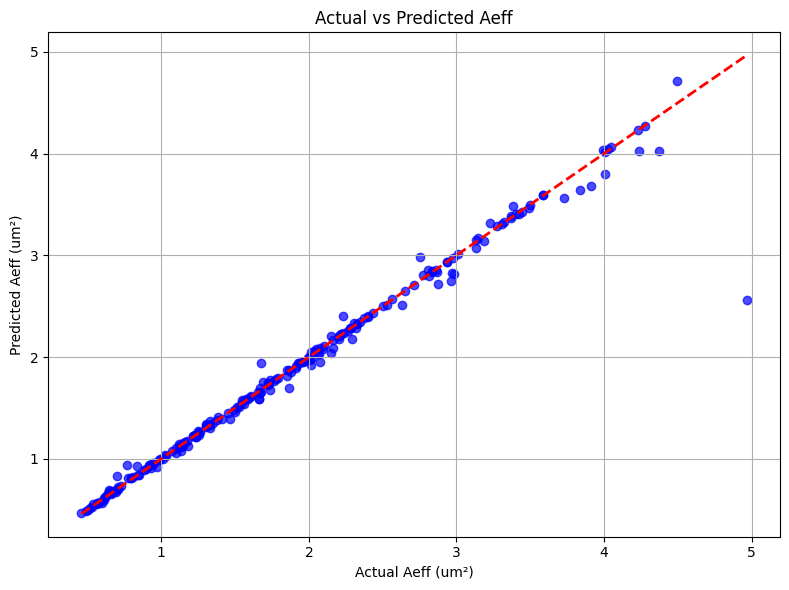

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have y_test_original and y_pred as numpy arrays
actual_aeff = y_test_original[:, 1]
predicted_aeff = y_pred[:, 1]

# Plot actual vs predicted Aeff
plt.figure(figsize=(8, 6))
plt.scatter(actual_aeff, predicted_aeff, color='blue', alpha=0.7)
plt.plot([min(actual_aeff), max(actual_aeff)],
         [min(actual_aeff), max(actual_aeff)],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Aeff')
plt.xlabel('Actual Aeff (um²)')
plt.ylabel('Predicted Aeff (um²)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming actual_neff and predicted_neff are numpy arrays from your test and prediction
aeff_comparison_df = pd.DataFrame({
    'Actual aeff': actual_aeff,
    'Predicted aeff': predicted_aeff
})

print(aeff_comparison_df.head())

   Actual aeff  Predicted aeff
0     0.458466        0.463301
1     4.234090        4.026690
2     1.411980        1.385778
3     0.706059        0.721715
4     1.723960        1.746361


In [ ]:
# Compute evaluation metrics for neff
mse_aeff = mean_squared_error(actual_aeff, predicted_aeff)
mape_aeff = mean_absolute_percentage_error(actual_aeff, predicted_aeff)
r2_aeff = r2_score(actual_aeff, predicted_aeff)

print(f"Mean Squared Error (MSE) for aeff: {mse_aeff:.6f}")
print(f"Mean Absolute Percentage Error (MAPE) for aeff: {mape_aeff * 100:.2f}%")
print(f"R² Score for aeff: {r2_aeff:.4f}")

Mean Squared Error (MSE) for aeff: 0.029987
Mean Absolute Percentage Error (MAPE) for aeff: 1.99%
R² Score for aeff: 0.9699


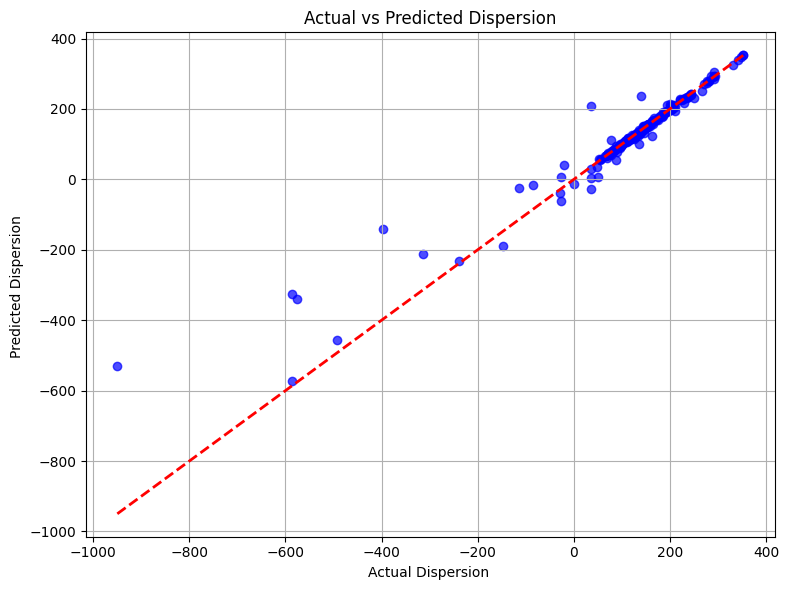

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test_original and y_pred are numpy arrays and already available
actual_dispersion = y_test_original[:, 2]
predicted_dispersion = y_pred[:, 2]

# Plot actual vs predicted dispersion
plt.figure(figsize=(8, 6))
plt.scatter(actual_dispersion, predicted_dispersion, color='blue', alpha=0.7)
plt.plot([min(actual_dispersion), max(actual_dispersion)],
         [min(actual_dispersion), max(actual_dispersion)],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Dispersion')
plt.xlabel('Actual Dispersion ')
plt.ylabel('Predicted Dispersion ')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
disp_comparison_df = pd.DataFrame({
    'Actual disp': actual_dispersion,
    'Predicted disp': predicted_dispersion
})

print(disp_comparison_df.head())

   Actual disp  Predicted disp
0     352.0200      352.408214
1      81.6006       83.055460
2     204.1780      200.144909
3     228.3740      216.992486
4     113.2570      118.116446


In [ ]:
# Compute evaluation metrics for disp
mse_disp = mean_squared_error(actual_dispersion, predicted_dispersion)
mape_disp = mean_absolute_percentage_error(actual_dispersion, predicted_dispersion)
r2_disp = r2_score(actual_dispersion, predicted_dispersion)

print(f"Mean Squared Error (MSE) for disp: {mse_disp:.6f}")
print(f"Mean Absolute Percentage Error (MAPE) for disp: {mape_disp * 100:.2f}%")
print(f"R² Score for disp: {r2_disp:.4f}")

Mean Squared Error (MSE) for disp: 2037.909470
Mean Absolute Percentage Error (MAPE) for disp: 91.08%
R² Score for disp: 0.9080


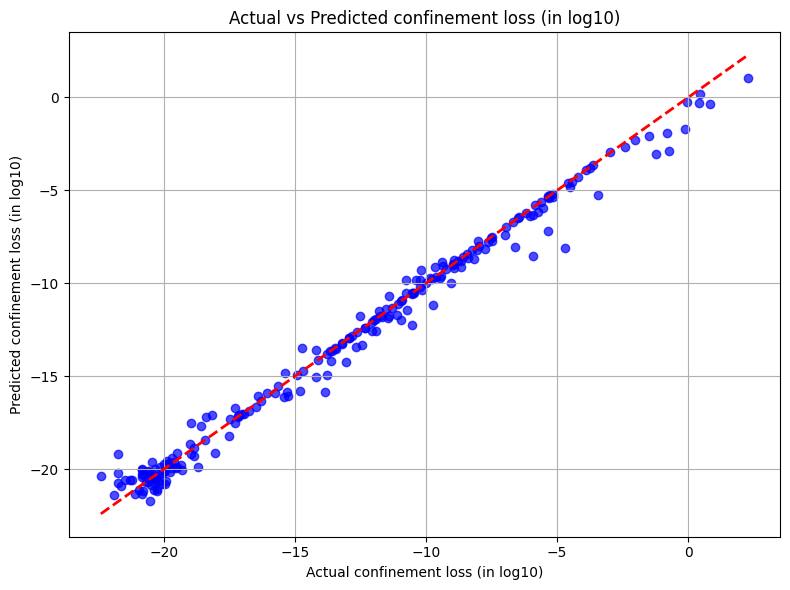

In [ ]:
# Assuming y_test_original and y_pred are numpy arrays and already available
actual_conf_loss = y_test_original[:, 3]
predicted_conf_loss = y_pred[:, 3]

# Plot actual vs predicted conf_loss
plt.figure(figsize=(8, 6))
plt.scatter(actual_conf_loss, predicted_conf_loss, color='blue', alpha=0.7)
plt.plot([min(actual_conf_loss), max(actual_conf_loss)],
         [min(actual_conf_loss), max(actual_conf_loss)],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted confinement loss (in log10)')
plt.xlabel('Actual confinement loss (in log10)')
plt.ylabel('Predicted confinement loss (in log10)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
conf_loss_comparison_df = pd.DataFrame({
    'Actual confinement loss (in log10)': actual_conf_loss,
    'Predicted confinement loss (in log10)': predicted_conf_loss
})

print(conf_loss_comparison_df.shape)
print(conf_loss_comparison_df.head())

(224, 2)
   Actual confinement loss (in log10)  Predicted confinement loss (in log10)
0                          -19.687321                             -19.389742
1                           -5.163552                              -5.360136
2                          -18.831497                             -19.278978
3                          -10.391590                              -9.819815
4                          -20.149192                             -19.906647


In [ ]:
# Compute evaluation metrics for conf_loss
mse_conf_loss = mean_squared_error(actual_conf_loss, predicted_conf_loss)
mape_conf_loss = mean_absolute_percentage_error(actual_conf_loss, predicted_conf_loss)
r2_conf_loss = r2_score(actual_conf_loss, predicted_conf_loss)

print(f"Mean Squared Error (MSE) for conf_loss: {mse_conf_loss:.6f}")
print(f"Mean Absolute Percentage Error (MAPE) for conf_loss: {mape_conf_loss * 100:.2f}%")
print(f"R² Score for conf_loss: {r2_conf_loss:.4f}")

Mean Squared Error (MSE) for conf_loss: 0.486800
Mean Absolute Percentage Error (MAPE) for conf_loss: 17.75%
R² Score for conf_loss: 0.9872
